In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("caso.csv")

In [2]:
obitos_hoje = df[df["date"] == "2021-03-11"]

obitos_compacto = obitos_hoje.drop(columns=["city_ibge_code","confirmed","estimated_population_2019","order_for_place","is_last","confirmed_per_100k_inhabitants","death_rate" ])
obitos_compacto = obitos_compacto[obitos_compacto["place_type"]=="city"]
obitos_compacto = obitos_compacto.rename(columns={'state':'SG_UF'})

#CORREÇÕES DAS BASES
obitos_compacto['city'] = obitos_compacto['city'].str.upper() 
obitos_compacto['city'] = obitos_compacto['city'].str.replace("'"," ")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("WESTFÁLIA","WESTFALIA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("TABOCÃO","FORTALEZA DO TABOCÃO")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("GRÃO PARÁ","GRÃO-PARÁ")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("SÃO TOMÉ DAS LETRAS","SÃO THOMÉ DAS LETRAS")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("SEM-PEIXE","SEM PEIXE")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("SÃO LUIZ DO PARAITINGA","SÃO LUÍS DO PARAITINGA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("LUÍS CORREIA","LUIS CORREIA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ANTÔNIO OLINTO","ANTONIO OLINTO")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("SANTO ANTÔNIO DO CAIUÁ","SANTO ANTONIO DO CAIUÁ")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("PINGO-D ÁGUA","PINGO D ÁGUA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("OLHOS-D ÁGUA","OLHOS D ÁGUA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("DONA EUZÉBIA","DONA EUSÉBIA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("QUIJINGUE","QUINJINGUE")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ANTÔNIO OLINTO","ANTONIO OLINTO")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("CAÉM","CAEM")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("SANTO ESTÊVÃO","SANTO ESTEVÃO")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ELDORADO DO CARAJÁS","ELDORADO DOS CARAJÁS")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ANHANGUERA","ANHANGÜERA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ERERÉ","ERERÊ")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("CAMACAN","CAMACÃ")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("SANTA IZABEL DO PARÁ","SANTA ISABEL DO PARÁ")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ATILIO VIVACQUA","ATÍLIO VIVÁCQUA")
obitos_compacto['city'] = obitos_compacto['city'].str.replace("ATILIO VIVACQUA","ATÍLIO VIVÁCQUA")
#obitos_compacto['city'] = obitos_compacto['city'].str.replace("SANTA TERESINHA","SANTA TEREZINHA") gera problema pois 
#tem mais cidades com esse nome em outros estados
obitos_compacto.loc[((obitos_compacto.SG_UF == 'BA')&(obitos_compacto.city == 'SANTA TERESINHA')),'city']='SANTA TEREZINHA'

df_1 = obitos_compacto["estimated_population"]/100000
df_2 = obitos_compacto["deaths"]
df3 = df_2/df_1

obitos_compacto["mortes_100mil"] = df3
obitos_final = obitos_compacto.drop(columns=["place_type", "deaths","estimated_population","date"])
obitos_final = obitos_final[obitos_final["mortes_100mil"].notna()]

#obitos_final.isnull().sum().sum()

obitos_final


,SG_UF,city,mortes_100mil
366,AP,AMAPÁ,97.964515
681,AP,CALÇOENE,79.603750
991,AP,CUTIAS,49.172267
1297,AP,FERREIRA GOMES,75.310656
1606,AP,ITAUBAL,53.409293
...,...,...,...
1631407,SP,ÁGUAS DE SÃO PEDRO,56.802045
1631731,SP,ÁLVARES FLORENCE,191.938580
1632006,SP,ÁLVARES MACHADO,64.005120
1632312,SP,ÁLVARO DE CARVALHO,75.843762


In [3]:
teste = obitos_final[obitos_final["city"]=="BRASÍLIA"]
teste

,SG_UF,city,mortes_100mil
34205,DF,BRASÍLIA,150.467293


In [4]:
df2 = pd.read_csv("votacao.csv", sep=';', encoding ='ansi')
segundo_turno = df2[df2["NR_TURNO"] == 2]
segundo_turno = segundo_turno.drop(columns=["CD_MUNICIPIO","NM_URNA_CANDIDATO","NR_PARTIDO","CD_SIT_TOT_TURNO","DS_SIT_TOT_TURNO","ST_VOTO_EM_TRANSITO","DS_CARGO","NM_PARTIDO","NM_CANDIDATO","DT_GERACAO","HH_GERACAO","CD_TIPO_ELEICAO","NM_TIPO_ELEICAO","ANO_ELEICAO","CD_ELEICAO","DS_ELEICAO","NR_TURNO","DT_ELEICAO","TP_ABRANGENCIA","SG_UE","NM_UE","NR_ZONA","CD_CARGO","SQ_CANDIDATO","NM_SOCIAL_CANDIDATO","CD_SITUACAO_CANDIDATURA","DS_SITUACAO_CANDIDATURA","DS_SITUACAO_CANDIDATURA","SG_PARTIDO","NM_COLIGACAO","SQ_COLIGACAO","DS_COMPOSICAO_COLIGACAO","CD_DETALHE_SITUACAO_CAND","DS_DETALHE_SITUACAO_CAND","TP_AGREMIACAO"])
segundo_turno = segundo_turno.rename(columns={'NM_MUNICIPIO': 'city'})
segundo_turno = segundo_turno.sort_values(by=['city'])
segundo_turno = segundo_turno[segundo_turno["SG_UF"] != "ZZ"]

#teste = segundo_turno[(segundo_turno["city"]=="SÃO LUIZ DO PARAITINGA")]
#teste                    

In [5]:
#teste2 = segundo_turno[(segundo_turno["city"]=="GUARIBAS") & (segundo_turno["NR_CANDIDATO"]==17)]
#teste3 = segundo_turno[(segundo_turno["city"]=="GUARIBAS") & (segundo_turno["NR_CANDIDATO"]==13)]

bolsonaro = segundo_turno[(segundo_turno["NR_CANDIDATO"]==17)]
bolsonaro = bolsonaro.rename(columns={'QT_VOTOS_NOMINAIS': 'voto_bolsonaro'})
bolsonaro = bolsonaro.drop(columns=["NR_CANDIDATO"])
bolsonaro = bolsonaro.groupby(["city","SG_UF"]).sum()

haddad = segundo_turno[(segundo_turno["NR_CANDIDATO"]==13)]
haddad = haddad.rename(columns={'QT_VOTOS_NOMINAIS':'voto_haddad'})
haddad = haddad.drop(columns=["NR_CANDIDATO"])
haddad = haddad.groupby(["city","SG_UF"]).sum()

#teste = haddad.loc["BONITO"]
#teste = bolsonaro[(bolsonaro["city"]=="BRASÍLIA")]              

total_votos = pd.merge(haddad,bolsonaro,how="inner",on=["city","SG_UF"])

total_votos["total"] = total_votos["voto_haddad"] + total_votos["voto_bolsonaro"]
total_votos["haddad"] = (total_votos["voto_haddad"] / total_votos["total"])*100
total_votos["bolsonaro"] = (total_votos["voto_bolsonaro"] / total_votos["total"])*100
total_votos = total_votos.drop(columns=["voto_haddad","voto_bolsonaro","total"])
total_votos = total_votos.sort_values(by=['bolsonaro'], ascending=False)

# aqui começa o merge das tabelas de covid e do tse

merge = pd.merge(obitos_final,total_votos,how="left",on=["city","SG_UF"])
merge = merge.sort_values(by=['bolsonaro'], ascending=False)

#teste = merge[merge["city"]=="BRASÍLIA"]

final_haddad = merge
final_haddad = final_haddad.drop(columns=["bolsonaro"])
final_haddad = final_haddad.sort_values(by=['haddad'], ascending=False)

final_bolsonaro = merge
final_bolsonaro = final_bolsonaro.drop(columns=["haddad"])
final_bolsonaro = final_bolsonaro.sort_values(by=['bolsonaro'], ascending=False)

#final_bolsonaro = final_bolsonaro[final_bolsonaro["bolsonaro"].notna()]
#final_haddad = final_haddad[final_haddad["haddad"].notna()]

print(final_haddad.isnull().sum().sum())
print(final_bolsonaro.isnull().sum().sum())

0
0


In [6]:
merge = merge[merge['mortes_100mil'] != 0]
merge.corr()

,mortes_100mil,haddad,bolsonaro
mortes_100mil,1.00000,-0.28989,0.28989
haddad,-0.28989,1.00000,-1.00000
bolsonaro,0.28989,-1.00000,1.00000


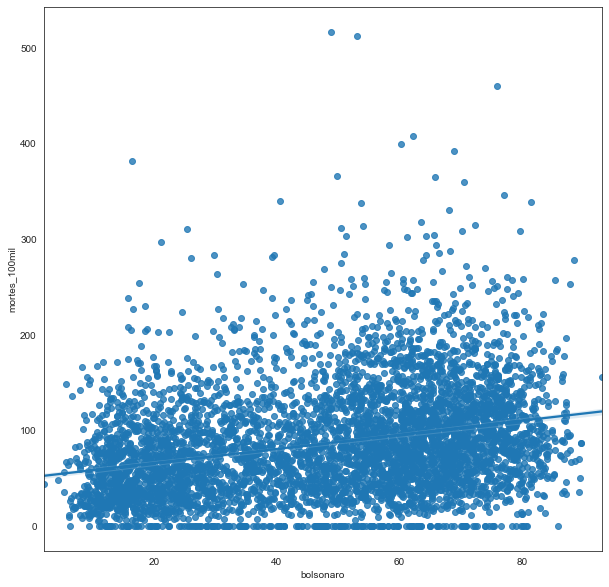

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
#sns.scatterplot(x="bolsonaro", y="mortes_100mil", data=final_bolsonaro)
#sns.lmplot(x='bolsonaro',y='mortes_100mil',data=final_bolsonaro,fit_reg=True) 
sns.regplot(x='bolsonaro',y='mortes_100mil',data=final_bolsonaro,fit_reg=True) 
#sns.lmplot(x='bolsonaro', y='mortes_100mil', data=final_bolsonaro)
plt.show()

In [9]:

import statsmodels.formula.api as sm
reg = sm.ols(formula='mortes_100mil~bolsonaro', data=final_bolsonaro).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          mortes_100mil   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     443.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.64e-94
Time:                        00:23:32   Log-Likelihood:                -27622.
No. Observations:                5091   AIC:                         5.525e+04
Df Residuals:                    5089   BIC:                         5.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.1427      1.862     27.466      0.0

In [ ]:
final_haddad.to_csv('haddad.csv',index=False)
final_bolsonaro.to_csv('bolsonaro.csv',index=False)

In [ ]:
final_bolsonaro['bolsonaro'] = final_bolsonaro['bolsonaro'].astype(str)
final_bolsonaro['bolsonaro'] = final_bolsonaro['bolsonaro'].str.replace('.', ',')
final_bolsonaro['mortes_100mil'] = final_bolsonaro['mortes_100mil'].astype(str)
final_bolsonaro['mortes_100mil'] = final_bolsonaro['mortes_100mil'].str.replace('.', ',')

final_bolsonaro.to_csv('bolsonaro.csv',index=False)